In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/BikeRentalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)  

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [4]:
data.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,2,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,7,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,6,14


In [5]:
data.ndim

2

In [6]:
data.shape

(17377, 14)

In [7]:
data.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [8]:
data.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

# Data Exploration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


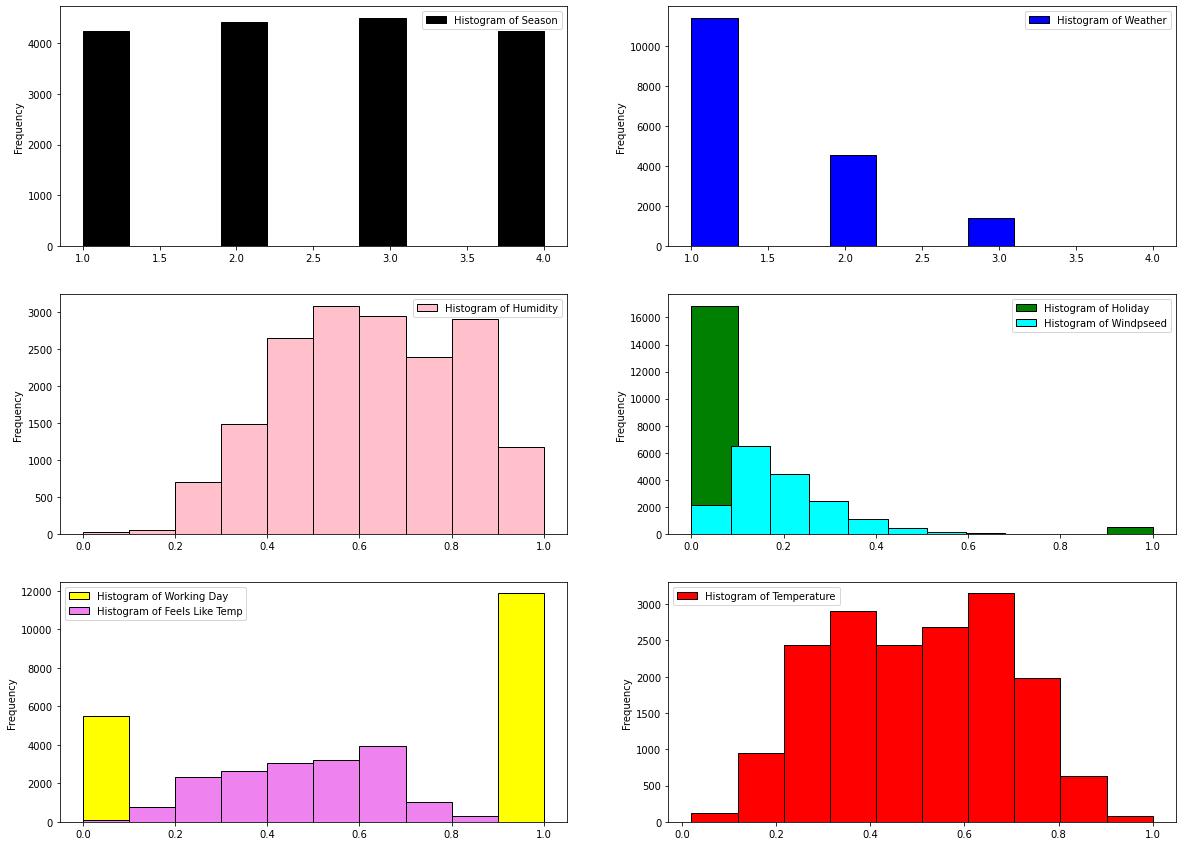

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(321)
data['season'].plot.hist(bins=10, color='black', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')# the towers or bars of histogram are bins
plt.subplot(322)
data['weathersit'].plot.hist(bins=10, color='blue', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(323)
data['hum'].plot.hist(bins=10, color='pink', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(324)
data['holiday'].plot.hist(bins=10, color='green', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(325)
data['workingday'].plot.hist(bins=10, color='yellow', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(326)
data['temp'].plot.hist(bins=10, color='red', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(325)
data['atemp'].plot.hist(bins=10, color='violet', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(324)
data['windspeed'].plot.hist(bins=10, color='cyan', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')


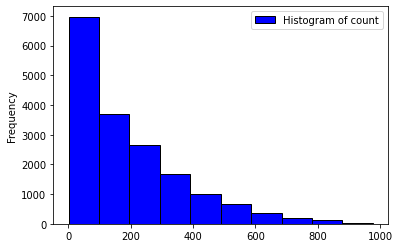

In [10]:
data['cnt'].plot.hist(bins=10, color='blue', label='Histogram of count', edgecolor='black')
plt.legend(loc='best')

In [11]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['yr']
BikeRentalData = data.drop(UselessColumns,axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [12]:
data.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

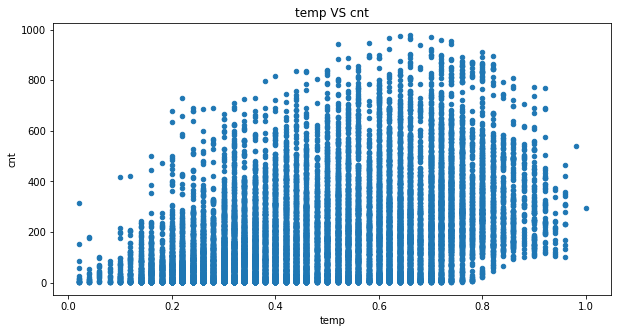

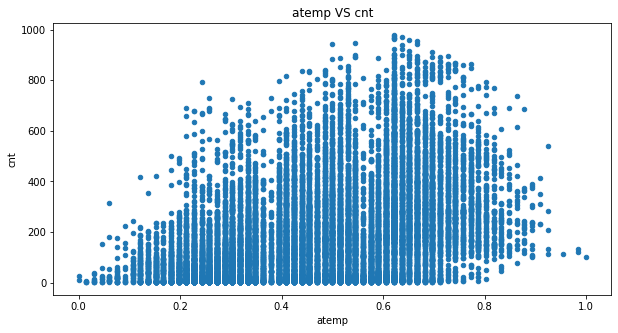

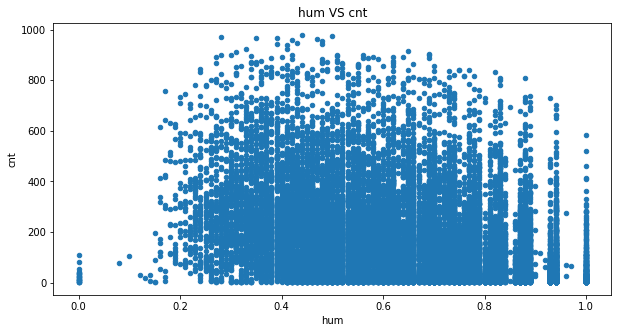

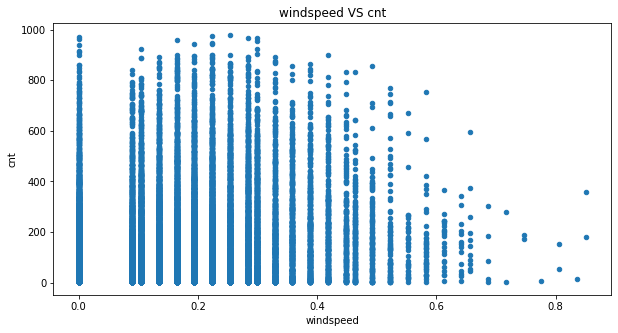

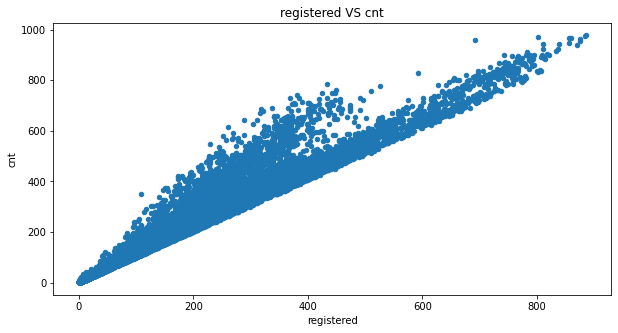

In [13]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

In [14]:
ContinuousCols=['cnt','temp','atemp','hum','windspeed','registered']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.000000,0.404798,0.400950,-0.322872,0.093155,0.972148
temp,0.404798,1.000000,0.987671,-0.069931,-0.023141,0.335377
atemp,0.400950,0.987671,1.000000,-0.051960,-0.062357,0.332571
hum,-0.322872,-0.069931,-0.051960,1.000000,-0.290070,-0.273891
windspeed,0.093155,-0.023141,-0.062357,-0.290070,1.000000,0.082244
registered,0.972148,0.335377,0.332571,-0.273891,0.082244,1.000000


In [15]:
## Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['cnt'][abs(CorrelationData['cnt']) > 0.5 ]

cnt           1.000000
registered    0.972148
Name: cnt, dtype: float64

In [16]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [17]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
FunctionAnova(inpData=BikeRentalData, 
              TargetVariable='cnt', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with cnt | P-Value: 5.106220835895279e-257
mnth is correlated with cnt | P-Value: 5.2484657372432516e-284
hr is correlated with cnt | P-Value: 0.0
holiday is correlated with cnt | P-Value: 4.495359698010671e-05
weekday is correlated with cnt | P-Value: 0.0018766923121991564
workingday is correlated with cnt | P-Value: 6.675147740900618e-05
weathersit is correlated with cnt | P-Value: 1.4485803474430875e-81


['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

In [18]:
SelectedColumns=['registered','season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Selecting final columns
DataForML=BikeRentalData[SelectedColumns]
DataForML.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [19]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['cnt']=BikeRentalData['cnt']

# Printing sample rows
DataForML_Numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


In [20]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'cnt'],
      dtype='object')

In [21]:
sub_df = data[['cnt', 'registered','temp', 'atemp', 'windspeed', 'workingday', 'holiday']]

In [22]:
# Separate Target Variable and Predictor Variables
TargetVariable='cnt'
Predictors=['registered', 'season', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [23]:
import seaborn as sns

# linear regression

In [24]:
#Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9573666301103526

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         426.0
1  237         242.0
2  343         254.0
3  181         174.0
4   98          97.0
Mean Accuracy on test data: 35.12058849386159
Median Accuracy on test data: 86.73691215616681

Accuracy values for 10-fold Cross Validation:
 [-74.07929873  26.65796421  59.00921878  49.87501303  14.90766055
  13.94538914  48.55944791  69.51846121  69.73312601  39.90684357]

Final Average Accuracy of the model: 31.8


### Random Forest

RandomForestRegressor(criterion='mse', max_depth=10)
R2 Value: 0.9927291492647838

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         390.0
1  237         229.0
2  343         320.0
3  181         157.0
4   98          91.0
Mean Accuracy on test data: 91.14639816363453
Median Accuracy on test data: 94.4954128440367

Accuracy values for 10-fold Cross Validation:
 [87.53859264 88.26582589 90.90685695 91.11545345 87.93763027 84.69255471
 89.7421976  92.58428325 92.04682325 88.74201063]

Final Average Accuracy of the model: 89.36


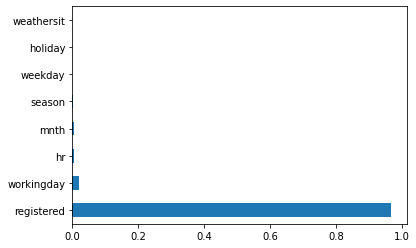

In [25]:
import warnings
warnings.filterwarnings("ignore")


# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
import warnings 
warnings.filterwarnings(action= 'ignore')


# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['cnt']-TestingDataResults['Predictedcnt']))/TestingDataResults['cnt'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(max_depth=10)
[18:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9980373158256919

##### Model Validation and Accuracy Calculations ##########
   cnt  Predictedcnt
0  379         386.0
1  237         228.0
2  343         298.0
3  181         155.0
4   98          91.0
Mean Accuracy on test data: 91.84621446473392
Median Accuracy on test data: 95.54909560723515
[18:08:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:12] WARNING: /workspa

# Count season

In [ ]:
# add a count_season column using join
by_season = data.copy().groupby(['season'])[['cnt']].agg(sum)
by_season.columns = ['cnt_season']
all_df = data.join(by_season, on='season')

In [ ]:
by_season

In [ ]:
by_season.plot(kind='barh', color='red')
plt.grid(True)
plt.show();

In [ ]:
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

In [ ]:
import datetime

In [ ]:
#unstack() is used
by_hour = data.copy().groupby(['hr', 'workingday'])['cnt'].agg('sum')
by_hour.head(20)

In [ ]:
by_hour.unstack()

In [ ]:
# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar',figsize=(15,10), width=0.8);
plt.grid(True)
plt.tight_layout();

In [ ]:
train_df = data.copy()


In [ ]:
#train_df.boxplot(column='count', by='hour', figsize=(15,5))
#plt.ylabel('Count of Users')
#plt.title("Boxplot of Count grouped by hour")
#plt.suptitle("") # get rid of the pandas autogenerated title

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x=train_df['hr'], y=train_df['cnt'],color='pink', ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");
#plt.suptitle("") # get rid of the pandas autogenerated titl

## Good Weather

In [ ]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weathersit'] == 1][['hr', 'season']].copy()
data = pd.DataFrame({'cnt' : good_weather.groupby(["hr","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x=data["hr"], y=data["cnt"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");


# Bad Weather


In [ ]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weathersit'] == 3][['hr', 'season']].copy()
data = pd.DataFrame({'cnt' : bad_weather.groupby(["hr","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x=data["hr"], y=data["cnt"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season")

## Bikes are rented more in Good Weather

In [ ]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = pd.DataFrame(train_df.groupby(["hr","weathersit"], sort=True)["cnt"].mean()).reset_index()
data['weathersit'] = data['weathersit'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x=data["hr"], y=data["cnt"], hue=data["weathersit"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

In [41]:
data.sample(n=10)

,hr,weathersit,cnt
11,3,Normal,12.452128
20,6,Normal,74.612903
2,0,Bad,28.115385
57,18,Normal,390.417722
44,14,Normal,208.654639
72,23,Good,93.981707
45,14,Bad,122.081967
19,6,Good,79.316372
38,12,Normal,225.869565
1,0,Normal,47.232432


In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [43]:
data5= pd.read_csv("/content/drive/MyDrive/Bike rental data 2.csv")

In [44]:
data5 = data5.groupby(level=0).first()  # remove duplicates
data5.flags.allows_duplicate_labels = False

In [45]:
data5

,month,cnt
0,2015-01,16
1,2015-02,40
2,2015-03,32
3,2015-04,13
4,2015-05,1
...,...,...
79,2021-08,57
80,2021-09,78
81,2021-10,97
82,2021-11,63


In [46]:
data5['cnt'].unique()

array([ 16,  40,  32,  13,   1,   2,   3,   8,  14,  36,  56,  84,  94,
       106, 110,  93,  67,  35,  37,  34,  28,  39,  17,   9,   6,  20,
        53,  70,  75,  59,  74,  76,  65,  30,  22,  31,   5,  64, 154,
        88,  44,  51,  61,  77,  72, 157,  52,  12,   4, 179, 100,  42,
        57,  78,  97,  63])

In [47]:
to_plot_monthly_variation = data5

In [48]:
mon = data5['month']

In [49]:
temp= pd.DatetimeIndex(mon)

In [50]:
month = pd.Series(temp.month)

In [51]:
to_plot_monthly_variation = to_plot_monthly_variation.drop(['month'], axis = 1)

In [52]:
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [53]:
to_plot_monthly_variation.head()

,cnt,month
0,16,1
1,40,2
2,32,3
3,13,4
4,1,5


In [54]:
data5['cnt'] = data5['cnt'].astype(np.int32)

In [55]:
to_plot_monthly_variation.tail()

,cnt,month
79,57,8
80,78,9
81,97,10
82,63,11
83,65,12


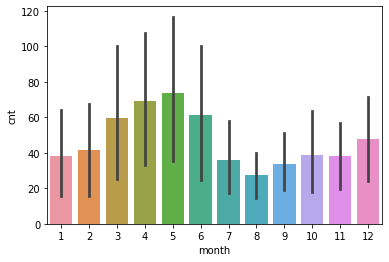

In [56]:
sns.barplot(x = 'month', y = 'cnt', data = to_plot_monthly_variation)
plt.show()

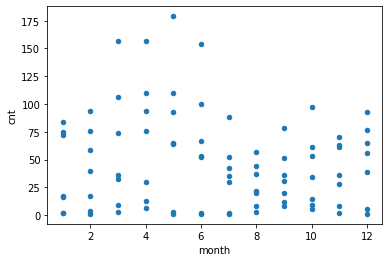

In [57]:
to_plot_monthly_variation.plot.scatter(x = 'month', y = 'cnt')
plt.show()

In [58]:
rider = data5[['cnt']]

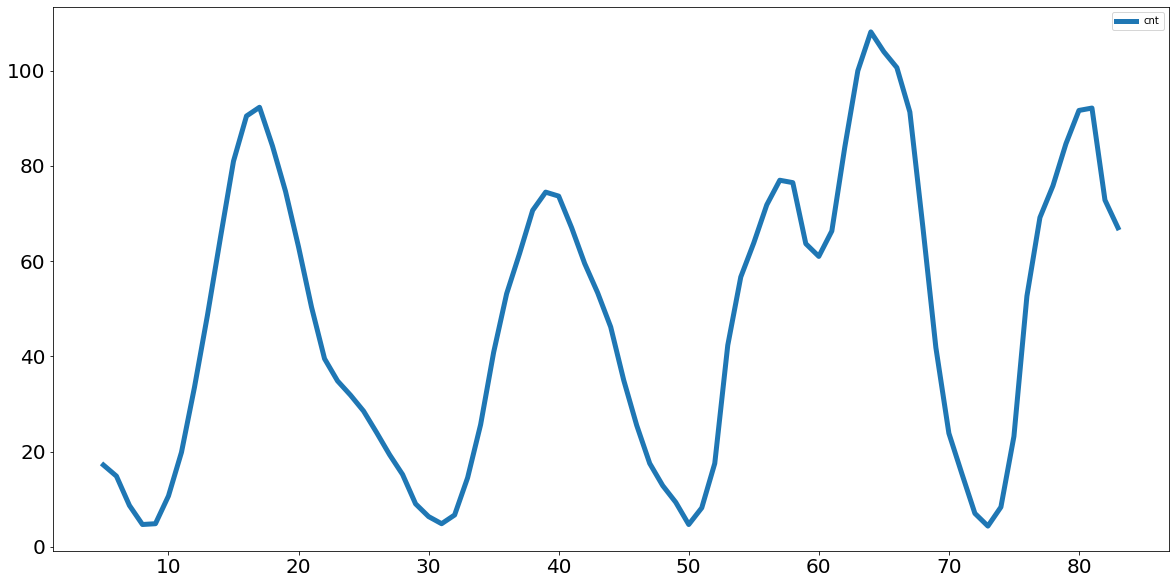

In [59]:
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

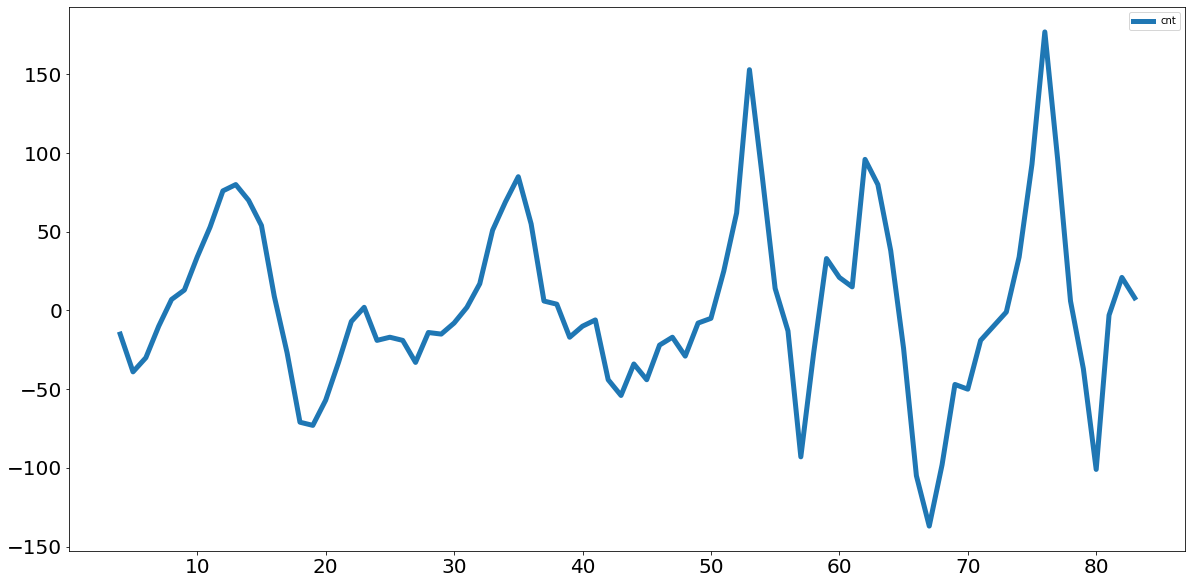

In [60]:
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

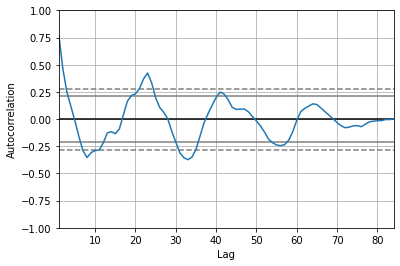

In [61]:
pd.plotting.autocorrelation_plot(data5['cnt'])
plt.show()

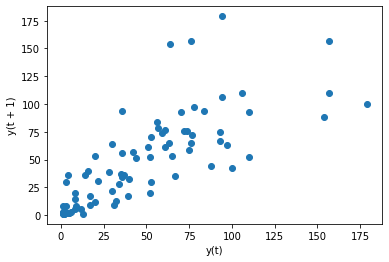

In [62]:
pd.plotting.lag_plot(data5['cnt'])
plt.show()

In [63]:

df = data5.set_index('month')

In [64]:
mod = sm.tsa.SARIMAX(data5['cnt'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                cnt   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -346.107
Date:                            Wed, 25 May 2022   AIC                            698.214
Time:                                    18:08:34   BIC                            705.002
Sample:                                         0   HQIC                           700.913
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2773      0.108     -2.560      0.010      -0.490      -0.065
ma.S.L12      -0.5648      0.191   

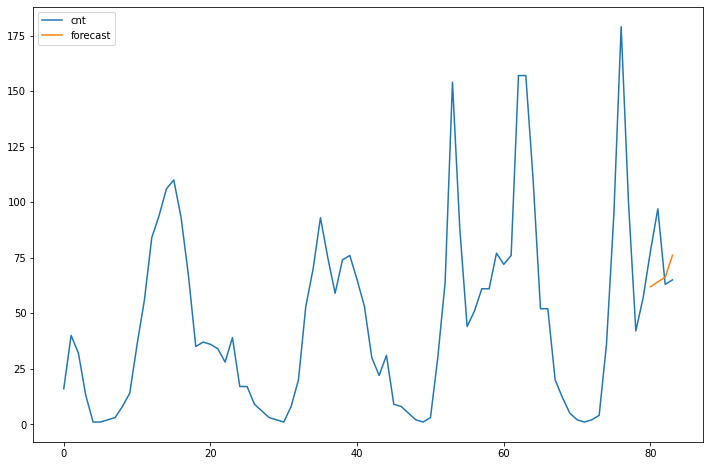

In [65]:
data5['forecast'] = results.predict(start = 80, end= 100, dynamic= True)  
data5[['cnt', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [66]:
data5.tail(3)

,month,cnt,forecast
81,2021-10,97,64.099829
82,2021-11,63,66.168625
83,2021-12,65,76.090127


In [67]:
def forcasting_future_months(data5, no_of_months):
    df_perdict = data5.reset_index()
    mon = df_perdict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    df_perdict = df_perdict.set_index('month')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns).set_flags(allows_duplicate_labels=False)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 80, end = 100, dynamic= True)  
    df_perdict[['month', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]

In [68]:
predicted = forcasting_future_months(data5,12)

TypeError: ignored